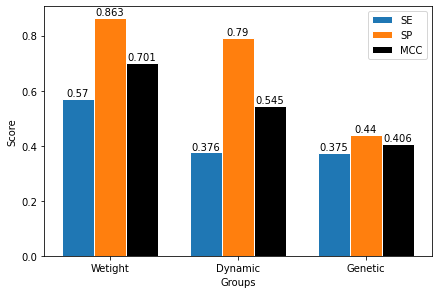

In [7]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

with open("E:/pythonProject1/Test/result_3_1.txt",'r') as f3_1:
    result3_1 = []
    for line in f3_1.readlines():
        result3_1.append(line.strip())
with open("E:/pythonProject1/Test/result_3_2.txt",'r') as f3_2:
    result3_2 = []
    for line in f3_2.readlines():
        result3_2.append(line.strip())
result3 = []
for i in [result3_1, result3_2]:
    result3.append(i)

with open("E:/pythonProject1/Test/target.txt",'r') as ft:
    target = []
    for line in ft.readlines():
        target.append(line.strip())
length = len(target)

with open("E:/pythonProject1/Test/result_3_3.txt",'r') as f3_3:
    result3_3 = []
    for line in f3_3.readlines():
        result3_3.append(line.strip())
with open("E:/pythonProject1/Test/target2.txt",'r') as ft2:
    target2 = []
    for line in ft2.readlines():
        target2.append(line.strip())
length2 = len(target2)

TP_3 = [0, 0, 0]
FN_3 = [0, 0, 0]
FP_3 = [0, 0, 0]
TN_3 = [0, 0, 0]
SE_3 = [0, 0, 0]
SP_3 = [0, 0, 0]
MCC_3 = [0, 0, 0]

for index in range(2): 
    for i in range(length):
        tmp_length = len(target[i])
        for j in range(tmp_length):
            if result3[index][i][j] == '(' and target[i][j] == '(' or result3[index][i][j] == ')' and target[i][j] == ')':
                TP_3[index] += 1
            if (result3[index][i][j] == '(' or result3[index][i][j] == ')') and target[i][j] == '.':
                FP_3[index] += 1
            if (target[i][j] == '(' or target[i][j] == ')') and result3[index][i][j] == '.':
                FN_3[index] += 1
            if result3[index][i][j] == '.' and target[i][j] == '.':
                TN_3[index] += 1
    SE_3[index] = TP_3[index] / (TP_3[index] + FN_3[index])
    SP_3[index] = TP_3[index] / (TP_3[index] + FP_3[index])
    MCC_3[index] = math.sqrt(SE_3[index] * SP_3[index])
    
for i in range(length2):
    tmp_length = len(target2[i])
    for j in range(tmp_length):
        if result3_3[i][j] == '(' and target2[i][j] == '(' or result3_3[i][j] == ')' and target2[i][j] == ')':
                TP_3[2] += 1
        if (result3_3[i][j] == '(' or result3_3[i][j] == ')') and target2[i][j] == '.':
                FP_3[2] += 1
        if (target2[i][j] == '(' or target2[i][j] == ')') and result3_3[i][j] == '.':
                FN_3[2] += 1
        if result3_3[i][j] == '.' and target2[i][j] == '.':
                TN_3[2] += 1
SE_3[2] = TP_3[2] / (TP_3[2] + FN_3[2])
SP_3[2] = TP_3[2] / (TP_3[2] + FP_3[2])
MCC_3[2] = math.sqrt(SE_3[2] * SP_3[2])

fig, ax = plt.subplots()

barWidth = 0.25
r1 = np.arange(len(SE_3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, SE_3, width=barWidth, edgecolor='white',label='SE' )
plt.bar(r2, SP_3, width=barWidth, edgecolor='white',label='SP' )
plt.bar(r3, MCC_3, width=barWidth, color='k',edgecolor='white',label='MCC' )

plt.tight_layout()  # 避免上下两图之间信息重叠
tick_spacing = 1   # 应对下表过于密集

plt.xticks([r + barWidth for r in range(len(SE_3))], ['Wetight','Dynamic','Genetic'])
    
for x,y in enumerate(SE_3):
    plt.text(x,y+0.01,"%s"%round(y,3),ha='center')  
for x,y in enumerate(SP_3):
    plt.text(x+0.25,y+0.01,"%s"%round(y,3),ha='center')
for x,y in enumerate(MCC_3):
    plt.text(x+0.5,y+0.01,"%s"%round(y,3),ha='center')
    
plt.legend()
plt.xlabel('Groups')
plt.ylabel('Score')
plt.show()